In [1]:
include("src/SimFunctions.jl")

Dict{String, IntegrationParameters} with 5 entries:
  "slow"       => IntegrationParameters(1000, 0.02)
  "fast"       => IntegrationParameters(100, 0.05)
  "very_slow"  => IntegrationParameters(10000, 0.02)
  "ultra_slow" => IntegrationParameters(100000, 0.02)
  "very_fast"  => IntegrationParameters(10, 0.1)

In [2]:
include("src/PlotFunctions.jl")

plot_spectral_weight

# Setting up the path and basic input parameters

In [3]:
k_density_spinon_dispersion=60
k_density_specweight=20

G = @SMatrix [0. 0. 0.;
	 0. 0. 0.;
	 1. 0. 0.]
Jpm = -0.046

Bmin =sqrt(-9*Jpm/5)
println("minimum B = ",Bmin)


lat = geom.PyroPrimitive(2,1,1)

sim_repo = Dict(
    "pipi00" => SimulationParameters("pipi00",
        lattice=lat,
        A=construct_landau_gauge(lat, [0 0 0 π; 0 0 0 0; 0 0 0 0]),
        Jpm=Jpm,
        B=(Bmin+0.1)*[0,1,1]/√3,
        n_samples = 100000
    ),
    "0flux" => SimulationParameters("0flux",
        lattice=lat,
        A=construct_landau_gauge(lat, [0 0 0 0; 0 0 0 0; 0 0 0 0]),
        Jpm=Jpm,
        B=[0,0,0],
        n_samples = 100000
    )
    )


minimum B = 0.28774989139876317


Dict{String, SimulationParameters} with 2 entries:
  "pipi00" => SimulationParameters([0.0 0.0 0.0 0.0; 0.0 0.0 0.0 3.14159], -0.0…
  "0flux"  => SimulationParameters([0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0], -0.046, …

In [4]:
# Checking that the A values realise the claimed states
for (k, v) in sim_repo
    println("fluxes of '$(k)' are \n$(calc_fluxes(v))\n")
end

fluxes of 'pipi00' are 
[-3.141592653589793 0.0 3.141592653589793 0.0; 3.141592653589793 0.0 -3.141592653589793 0.0]

fluxes of '0flux' are 
[0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]



In [5]:
sim = sim_repo["0flux"]
lambda = calc_lambda(sim) 

0.1411393911171631

In [6]:
high_symmetry_points = Dict(
    "\\Gamma"=> [0.,0.,0.],
    "X"=> [1.,0.,0.],
    "W"=> [1.,0.5,0.],
    "K"=> [0.75,0.75,0.],
    "L"=> [0.5,0.5,0.5],
    "U"=> [1.0, 0.25,0.25]
)


path = generate_path(geom.high_symmetry_points, 
	    split("\\Gamma X W K \\Gamma L U W"), 
		points_per_unit=k_density_spinon_dispersion, K_units=2π/8)


BZPath([0.0, 0.0, 0.01308996938995747, 0.02617993877991494, 0.039269908169872414, 0.05235987755982988, 0.06544984694978735, 0.07853981633974483, 0.0916297857297023, 0.10471975511965977  …  3.6098193866595754, 3.622909356049533, 3.6359993254394904, 3.649089294829448, 3.662179264219405, 3.6752692336093626, 3.68835920299932, 3.7014491723892777, 3.7145391417792353, 3.7276291111691924], [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.01308996938995747, 0.0, 0.0], [0.02617993877991494, 0.0, 0.0], [0.039269908169872414, 0.0, 0.0], [0.05235987755982988, 0.0, 0.0], [0.06544984694978735, 0.0, 0.0], [0.07853981633974483, 0.0, 0.0], [0.0916297857297023, 0.0, 0.0], [0.10471975511965977, 0.0, 0.0]  …  [0.7853981633974483, 0.3093950266082548, 0.08330405509046937], [0.7853981633974483, 0.318651032729418, 0.0740480489693061], [0.7853981633974483, 0.3279070388505813, 0.06479204284814283], [0.7853981633974483, 0.33716304497174454, 0.05553603672697957], [0.7853981633974483, 0.3464190510929078, 0.046280030605816314]

In [7]:
data_dir = "output"

println("Computing spinon dispersions...")
	# compute spinons
d = calc_spinons_along_path(data_dir, sim=sim, λ=lambda, path=path)
		

	# autorange this based on the spinon dispersion
band_data = load(d)["spinon_dispersion"]["bands"]
band_data[ isnan.(band_data) ] .= - Inf # an ugly hack
max_E = 2.2* maximum( band_data )
Egrid = collect(range(0,max_E,150)) # TODO consider updating this based on broadening_dE
println("Max energy for specweight: $(max_E)")

Computing spinon dispersions...


Spinon Dispersion: 100%|████████████████████████████████| Time: 0:00:00


Max energy for specweight: 1.3459232169831008


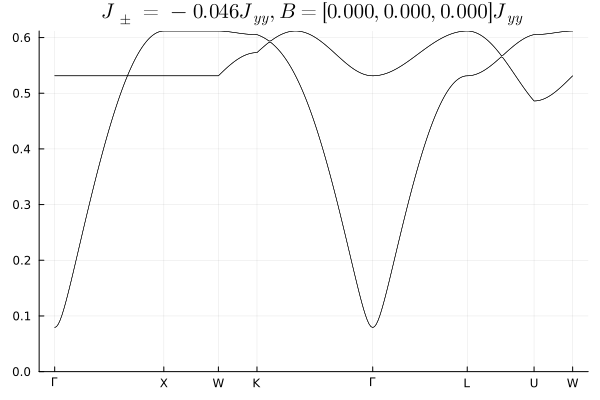

In [8]:
plot_spinons(load(d))

# The spectral weight calculation

In [ ]:
integral_params = integration_settings["slow"]

	
path2 = generate_path(geom.high_symmetry_points, 
	    split("\\Gamma X W K \\Gamma L U W"),
		points_per_unit=k_density_specweight, K_units=2π/8)



f = calc_spectral_weight_along_path(data_dir, 
	    sim=sim,
        λ=lambda,
	    ip=integral_params, 
	    Egrid=Egrid, path=path2,
#    g_tensor=G
)

	    
println("Saving data to ",f)

Spectral weight:  60%|████████████████████▍             |  ETA: 0:00:05

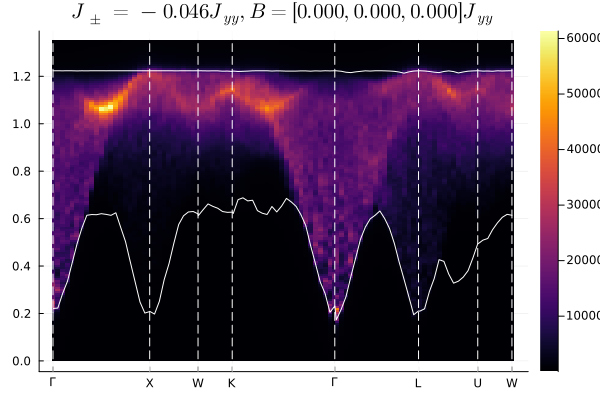

In [12]:
plot_spectral_weight(load(f))